In [20]:
import datetime as dt
import sys

import numpy as np
import pandas as pd
import pandas_datareader.data as web
import matplotlib.pyplot as plt

from arch import arch_model
%matplotlib inline
import seaborn
seaborn.mpl.rcParams['figure.figsize'] = (10.0, 6.0)
seaborn.mpl.rcParams['savefig.dpi'] = 90

In [21]:
df = pd.read_excel('../data/assets.xlsx', index_col=0)

In [22]:
df.head()

,881001.WI,HSI.HI,SPX.GI,065.CS,AU9999.SGE,B.IPE,H11025.CSI
2007-01-04,1461.2643,20025.58,1418.34,116.1885,158.58,0.0,1019.2584
2007-01-05,1474.4288,20211.28,1409.71,116.2254,156.94,0.0,1019.3131
2007-01-08,1522.0564,20029.66,1412.84,116.2289,153.72,0.0,1019.4650
2007-01-09,1564.7432,19898.08,1412.11,116.2638,154.45,0.0,1019.5195
2007-01-10,1603.9025,19568.34,1414.85,116.2990,154.34,0.0,1019.5750


In [23]:
returns = df['881001.WI'].pct_change().dropna()

In [24]:
am = arch_model(returns)
res = am.fit(update_freq=5)
print(res.summary())

Positive directional derivative for linesearch    (Exit mode 8)
            Current function value: -7013.88159694
            Iterations: 7
            Function evaluations: 35
            Gradient evaluations: 3


C:\Users\jgtzsx01\AppData\Local\Continuum\Anaconda2\lib\site-packages\arch\univariate\base.py:517: ConvergenceWarning: 
The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning)


                     Constant Mean - GARCH Model Results                      
Dep. Variable:              881001.WI   R-squared:                      -0.000
Mean Model:             Constant Mean   Adj. R-squared:                 -0.000
Vol Model:                      GARCH   Log-Likelihood:                7013.88
Distribution:                  Normal   AIC:                          -14019.8
Method:            Maximum Likelihood   BIC:                          -13996.3
                                        No. Observations:                 2598
Date:                Tue, Oct 10 2017   Df Residuals:                     2594
Time:                        10:52:37   Df Model:                            4
                                  Mean Model                                  
                 coef    std err          t      P>|t|        95.0% Conf. Int.
------------------------------------------------------------------------------
mu         5.6391e-04  1.357e-06    415.590      0.0

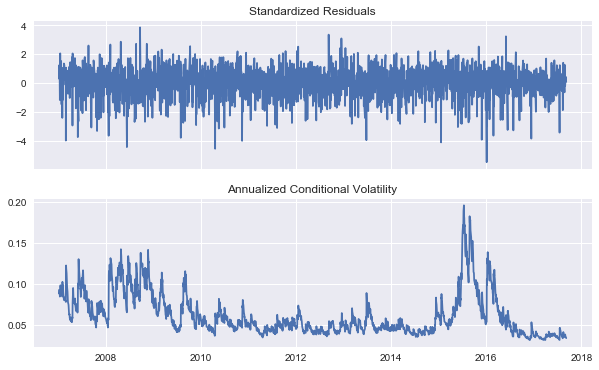

In [26]:
fig = res.plot(annualize='M')

In [27]:
res.params

mu          0.000564
omega       0.000007
alpha[1]    0.100000
beta[1]     0.880000
Name: params, dtype: float64

In [13]:
print(forecasts.mean.iloc[-3:])
print(forecasts.residual_variance.iloc[-3:])
print(forecasts.variance.iloc[-3:])

                 h.1
2017-09-04       NaN
2017-09-05       NaN
2017-09-06  0.017033
                 h.1
2017-09-04       NaN
2017-09-05       NaN
2017-09-06  0.000278
                 h.1
2017-09-04       NaN
2017-09-05       NaN
2017-09-06  0.000278


In [14]:
forecasts = res.forecast(horizon=5)
print(forecasts.residual_variance.iloc[-3:])

                 h.1       h.2       h.3       h.4      h.5
2017-09-04       NaN       NaN       NaN       NaN      NaN
2017-09-05       NaN       NaN       NaN       NaN      NaN
2017-09-06  0.000278  0.000276  0.000274  0.000272  0.00027


In [15]:
res = am.fit(last_obs = '2011-1-1', update_freq=5)
forecasts = res.forecast(horizon=5)
print(forecasts.variance.dropna().head())

Positive directional derivative for linesearch    (Exit mode 8)
            Current function value: -2805.27186345
            Iterations: 7
            Function evaluations: 35
            Gradient evaluations: 3
                 h.1       h.2       h.3       h.4       h.5
2010-12-31  0.000063  0.000068  0.000072  0.000077  0.000082
2011-01-04  0.000070  0.000075  0.000079  0.000084  0.000089
2011-01-05  0.000070  0.000074  0.000079  0.000084  0.000088
2011-01-06  0.000068  0.000073  0.000078  0.000082  0.000087
2011-01-07  0.000067  0.000072  0.000076  0.000081  0.000086


C:\Users\jgtzsx01\AppData\Local\Continuum\Anaconda2\lib\site-packages\arch\univariate\base.py:517: ConvergenceWarning: 
The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning)


In [16]:
index = returns.index
start_loc = 0
end_loc = np.where(index >= '2010-1-1')[0].min()
forecasts = {}
for i in range(20):
    sys.stdout.write('.')
    sys.stdout.flush()
    res = am.fit(first_obs=i, last_obs=i+end_loc, disp='off')
    temp = res.forecast(horizon=3).variance
    fcast = temp.iloc[i+end_loc-1]
    forecasts[fcast.name] = fcast
print()
print(pd.DataFrame(forecasts).T)

....

C:\Users\jgtzsx01\AppData\Local\Continuum\Anaconda2\lib\site-packages\arch\univariate\base.py:517: ConvergenceWarning: 
The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning)
C:\Users\jgtzsx01\AppData\Local\Continuum\Anaconda2\lib\site-packages\arch\univariate\base.py:517: ConvergenceWarning: 
The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning)
C:\Users\jgtzsx01\AppData\Local\Continuum\Anaconda2\lib\site-packages\arch\univariate\base.py:517: ConvergenceWarning: 
The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning)


...

C:\Users\jgtzsx01\AppData\Local\Continuum\Anaconda2\lib\site-packages\arch\univariate\base.py:517: ConvergenceWarning: 
The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning)
C:\Users\jgtzsx01\AppData\Local\Continuum\Anaconda2\lib\site-packages\arch\univariate\base.py:517: ConvergenceWarning: 
The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning)
C:\Users\jgtzsx01\AppData\Local\Continuum\Anaconda2\lib\site-packages\arch\univariate\base.py:517: ConvergenceWarning: 
The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning)


...

C:\Users\jgtzsx01\AppData\Local\Continuum\Anaconda2\lib\site-packages\arch\univariate\base.py:517: ConvergenceWarning: 
The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning)
C:\Users\jgtzsx01\AppData\Local\Continuum\Anaconda2\lib\site-packages\arch\univariate\base.py:517: ConvergenceWarning: 
The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning)


...

C:\Users\jgtzsx01\AppData\Local\Continuum\Anaconda2\lib\site-packages\arch\univariate\base.py:517: ConvergenceWarning: 
The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning)
C:\Users\jgtzsx01\AppData\Local\Continuum\Anaconda2\lib\site-packages\arch\univariate\base.py:517: ConvergenceWarning: 
The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning)
C:\Users\jgtzsx01\AppData\Local\Continuum\Anaconda2\lib\site-packages\arch\univariate\base.py:517: ConvergenceWarning: 
The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning)


...

C:\Users\jgtzsx01\AppData\Local\Continuum\Anaconda2\lib\site-packages\arch\univariate\base.py:517: ConvergenceWarning: 
The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning)
C:\Users\jgtzsx01\AppData\Local\Continuum\Anaconda2\lib\site-packages\arch\univariate\base.py:517: ConvergenceWarning: 
The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning)
C:\Users\jgtzsx01\AppData\Local\Continuum\Anaconda2\lib\site-packages\arch\univariate\base.py:517: ConvergenceWarning: 
The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning)


...

C:\Users\jgtzsx01\AppData\Local\Continuum\Anaconda2\lib\site-packages\arch\univariate\base.py:517: ConvergenceWarning: 
The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning)
C:\Users\jgtzsx01\AppData\Local\Continuum\Anaconda2\lib\site-packages\arch\univariate\base.py:517: ConvergenceWarning: 
The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning)


.()
                 h.1       h.2       h.3
2009-12-31  0.000093  0.000098  0.000104
2010-01-04  0.000113  0.000118  0.000123
2010-01-05  0.000108  0.000113  0.000118
2010-01-06  0.000102  0.000107  0.000113
2010-01-07  0.000098  0.000104  0.000109
2010-01-08  0.000095  0.000100  0.000106
2010-01-11  0.000091  0.000096  0.000102
2010-01-12  0.000097  0.000102  0.000108
2010-01-13  0.000099  0.000104  0.000110
2010-01-14  0.000095  0.000100  0.000106
2010-01-15  0.000103  0.000109  0.000114
2010-01-18  0.000098  0.000104  0.000109
2010-01-19  0.000109  0.000114  0.000119
2010-01-20  0.000115  0.000120  0.000125
2010-01-21  0.000146  0.000150  0.000155
2010-01-22  0.000186  0.000190  0.000194
2010-01-25  0.000173  0.000177  0.000181
2010-01-26  0.000162  0.000166  0.000170
2010-01-27  0.000152  0.000156  0.000160
2010-01-28  0.000156  0.000160  0.000164


In [17]:
# TARCH specification
am = arch_model(returns, vol='GARCH', power=2.0, p=1, o=1, q=1)
res = am.fit(update_freq=5)
forecasts = res.forecast()
print(forecasts.variance.iloc[-1])

Iteration:      5,   Func. Count:     71,   Neg. LLF: 1650.06955865
Inequality constraints incompatible    (Exit mode 4)
            Current function value: 10818.8284165
            Iterations: 7
            Function evaluations: 88
            Gradient evaluations: 6
h.1    0.001421
Name: 2017-09-06 00:00:00, dtype: float64


C:\Users\jgtzsx01\AppData\Local\Continuum\Anaconda2\lib\site-packages\arch\univariate\base.py:517: ConvergenceWarning: 
The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning)


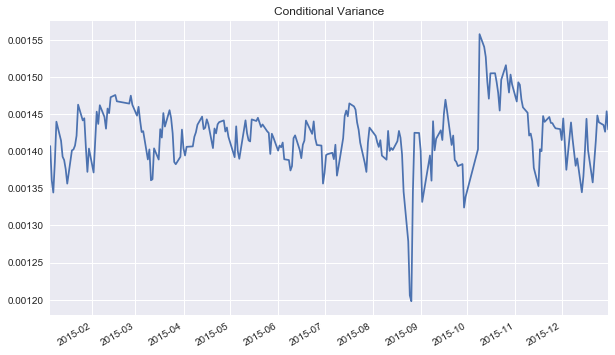

In [19]:
fig, ax = plt.subplots(1,1)
(res.conditional_volatility['2015'] ** 2.0).plot(ax=ax, title='Conditional Variance')